In [175]:
import pandas as pd
from datetime import datetime
import numpy as np

In [176]:
data=pd.read_csv('aiif_eikon_eod_data.csv',parse_dates=True)

In [177]:
data=pd.DataFrame(data['EUR='])

In [178]:
data.head()

,EUR=
0,1.4323
1,1.4411
2,1.4368
3,1.4412
4,1.4318


In [172]:

data.rename(columns={'EUR=':'price'},inplace=True)

In [146]:
data['SMA1']=data['price'].rolling(42).mean()
data['SMA2']=data['price'].rolling(252).mean()

In [147]:
data

,price,SMA1,SMA2
0,1.4323,NaN,NaN
1,1.4411,NaN,NaN
2,1.4368,NaN,NaN
3,1.4412,NaN,NaN
4,1.4318,NaN,NaN
...,...,...,...
2604,1.1096,1.107476,1.118769
2605,1.1175,1.107540,1.118624
2606,1.1197,1.107652,1.118505
2607,1.1210,1.107760,1.118403


In [148]:
from pylab import mpl,plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi']=300
mpl.rcParams['font.family']='serif'

<AxesSubplot:title={'center':'EUR/USD | 42 & 252 days SMAs'}>

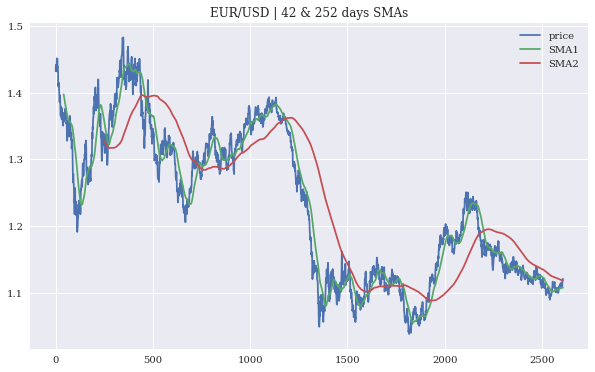

In [149]:
data.plot(title='EUR/USD | 42 & 252 days SMAs',figsize=(10,6))

In [150]:
data['position']=np.where(data['SMA1']>data['SMA2'],1,-1)

In [151]:
data.dropna(inplace=True)

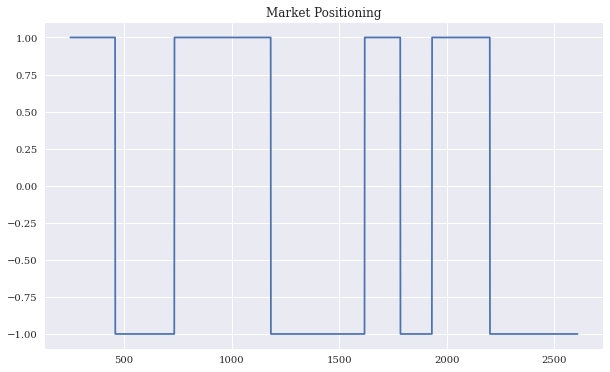

In [152]:
data['position'].plot(ylim=[-1.1,1.1],title='Market Positioning',figsize=(10,6));

In [153]:
data['returns']=np.log(data['price']/data['price'].shift(1))

<AxesSubplot:>

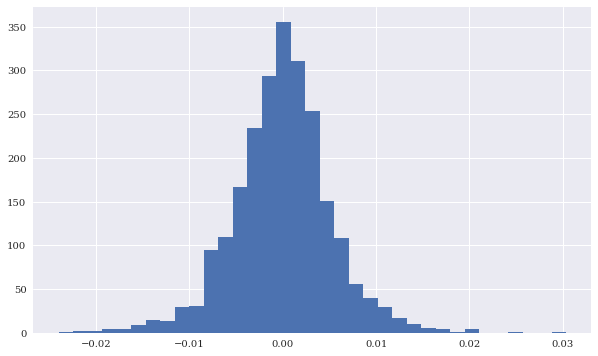

In [154]:
data['returns'].hist(bins=35,figsize=(10,6))

In [155]:
data['strategy']=data['position'].shift(1)*data['returns']

In [156]:
data[['returns','strategy']].sum()

returns    -0.157179
strategy    0.356502
dtype: float64

In [157]:
data[['returns','strategy']].sum().apply(np.exp)

returns     0.854551
strategy    1.428324
dtype: float64

In [158]:
data.head()

,price,SMA1,SMA2,position,returns,strategy
251,1.3118,1.354952,1.326780,1,NaN,NaN
252,1.3095,1.352919,1.326292,1,-0.001755,-0.001755
253,1.3099,1.350862,1.325772,1,0.000305,0.000305
254,1.3119,1.349100,1.325276,1,0.001526,0.001526
255,1.3115,1.347545,1.324762,1,-0.000305,-0.000305


<AxesSubplot:>

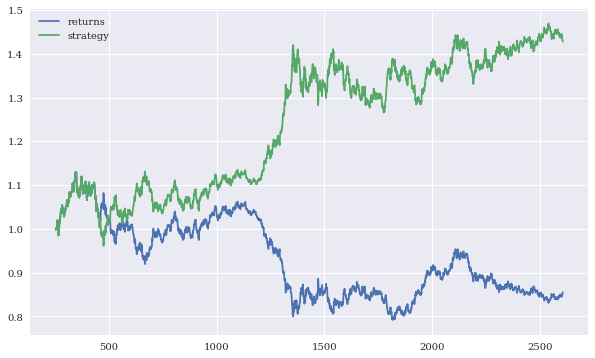

In [159]:
data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [160]:
data['cumret']=data['strategy'].cumsum().apply(np.exp)

In [161]:
data['cummax']=data['cumret'].cummax()

<AxesSubplot:>

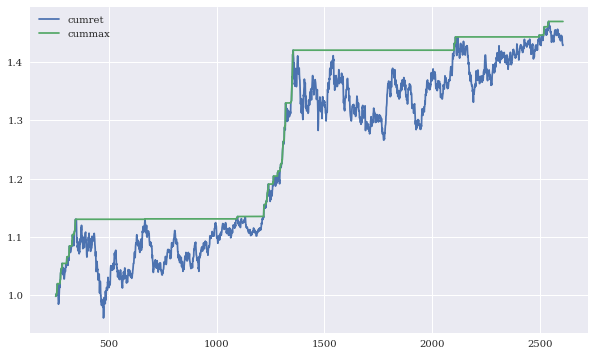

In [162]:
data[['cumret','cummax']].dropna().plot(figsize=(10,6))

In [163]:
data[['returns','strategy']].mean()*252

returns    -0.016805
strategy    0.038116
dtype: float64

In [164]:
np.exp(data[['returns','strategy']].mean()*252)-1

returns    -0.016664
strategy    0.038851
dtype: float64

In [165]:
data[['returns', 'strategy']].std() * 252 ** 0.5 


returns     0.083798
strategy    0.083770
dtype: float64

In [166]:
(data[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5

returns     0.083795
strategy    0.083745
dtype: float64

In [167]:
drawdown=data['cummax']-data['cumret']

In [171]:
print("Maximum Drawdown =",drawdown.max())
drawdown[:5]

Maximum Drawdown = 0.16917141539886038


251         NaN
252    0.000000
253    0.000000
254    0.000000
255    0.000305
dtype: float64